# Homework 1

Name: Kavana Manvi Krishnamuthy

ID: 2158984

## Part 1 - Getting familiar with image manipulation

Data: Mysore Palace, source - https://cdn.britannica.com/58/124658-050-28314DA4/Maharaja-Palace-Mysuru-Karnataka-India.jpg?w=300

In [5]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


In [6]:
image1 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW1/Image1.webp")

In [7]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

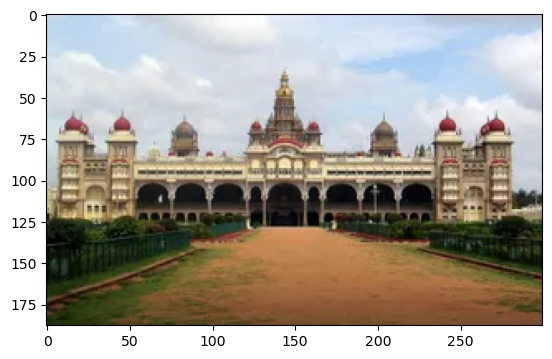

In [8]:
# Display the image
plt.imshow(image1_rgb)

### Write code that will:

### (a) Read an image, convert it to grayscale if it is not already, and display the converted image

In [11]:
if len(image1_rgb.shape) == 3:
    image1_grey = cv2.cvtColor(image1_rgb, cv2.COLOR_BGR2GRAY)
else:
    image1_grey = image1

cv2.imshow('Grayscale Image', image1_grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

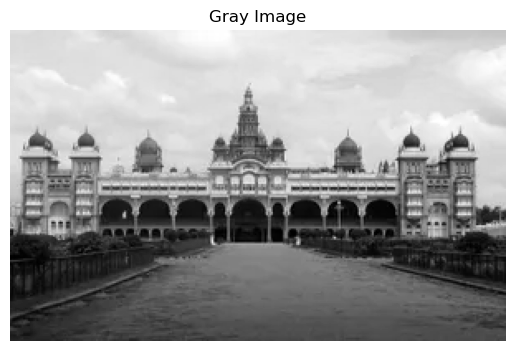

In [13]:
plt.imshow(image1_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

### (b) Calculate and report the size of image

In [15]:
length, breadth = image1_grey.shape
print("Total number of pixels: " +  str(length*breadth))

Total number of pixels: 56400


### (c) Calculate and report the maximum pixel value

In [17]:
import numpy as np

In [18]:
print("Maximum pixel value: " + str(np.max(image1_grey)))

Maximum pixel value: 255


### (d) Calculate and report the mean pixel value

In [20]:
image1_grey_avg_value = np.mean(image1_grey)
print("Mean pixel value: " + str(image1_grey_avg_value))

Mean pixel value: 141.66218085106382


### Change the pixel values of the image in the following way: all pixels’ values less than the average calculated at (d) will be equal to 0 and all the others will be equal to 1. Display your binary image. Make sure your displayed image is black and white, not black and near black.

In [22]:
image1_bin = np.where(image1_grey < image1_grey_avg_value, 0, 255).astype(np.uint8)

cv2.imshow('Binary Image', image1_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()

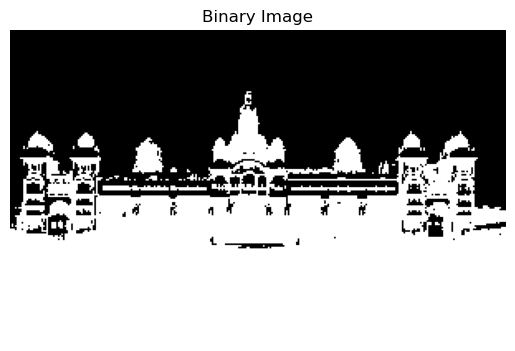

In [24]:
# Display the binary image
plt.imshow(image1_bin, cmap='binary')
plt.axis('off')
plt.title('Binary Image')
plt.show()

### In addition, perform your thresholding on a color image, thresholding separately in each color channel. Combine the results into a single image for display. The resulting image should be a color image.


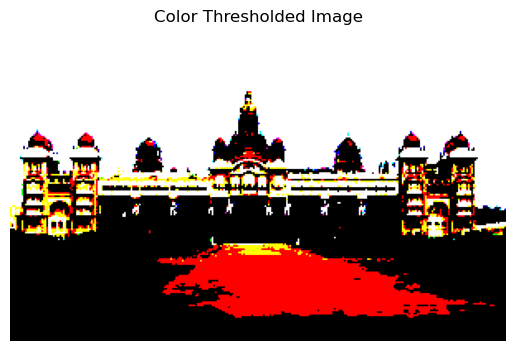

In [26]:
if len(image1_rgb.shape) == 3:  # Check if the image is color (3 channels)
    image1_blue = np.where(image1_rgb[:, :, 0] < np.mean(image1_rgb[:, :, 0]), 0, 255).astype(np.uint8)
    image1_green = np.where(image1_rgb[:, :, 1] < np.mean(image1_rgb[:, :, 1]), 0, 255).astype(np.uint8)
    image1_red = np.where(image1_rgb[:, :, 2] < np.mean(image1_rgb[:, :, 2]), 0, 255).astype(np.uint8)
    
    image1_threshold = cv2.merge([image1_blue,image1_green, image1_red])
    #cv2.imshow('Thresholding on a color image',image1_threshold)
    #cv2.waitKey(0)
    plt.imshow(image1_threshold)
    plt.axis('off')
    plt.title('Color Thresholded Image')
    plt.show()
#cv2.destroyAllWindows()

##### Results

We first load an image, converting it to grayscale only if it’s originally in color. Then display the grayscale version. Then we calculate the total pixel count, the maximum pixel intensity (brightness), and the average pixel value. Calculating the mean value, we create a binary black-and-white image, setting pixels brighter than the average to white and darker ones to black. For color images, the process is applied individually to the 3 channels- red, green, and blue. Thus we get a binary color image displayed.

## Part 2 - Image Interpolation

### Write code that will, given an input image, reduce its spatial resolution (use a reduction of 1/10 to 1/20 in each dimension), and then return it to its original resolution. Use all of nearest neighbor, bilinear and bicubic interpolation to do this. For each input, your display should include at least 7 images: the original, three reduced images and three restored images (one pair for each interpolation). Comment on the differences you see among the three restored images.
### In addition to your commentary on the visual differences, perform image subtraction between the original image each of the three restored images and show the subtraction results for each method of interpolation.

In [30]:
image2 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW1/Image2.jpeg")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

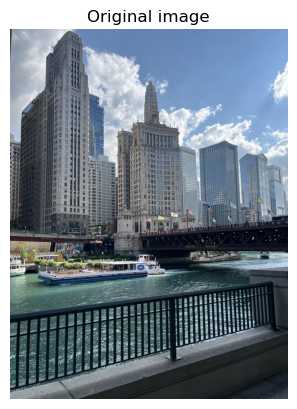

In [31]:
# Display the image
plt.imshow(image2_rgb)
plt.axis("off")
plt.title("Original image")
plt.show()

Data source: Picture of my favorite bridge in River North in Chicago. I took the picture right after buying my new iPhone at the Apple store in Michigan Ave.

In [33]:
reduction_factor = 0.1
new_width = int(image2.shape[1] * reduction_factor)
new_height = int(image2.shape[0] * reduction_factor)
new_size = (new_width, new_height)

In [34]:
reduced_image2_nearest = cv2.resize(image2_rgb, new_size, interpolation=cv2.INTER_NEAREST)

In [35]:
restored_image2_nearest = cv2.resize(reduced_image2_nearest, (image2_rgb.shape[1], image2_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)

In [36]:
difference_image2_nearest = cv2.absdiff(image2_rgb, restored_image2_nearest)

In [37]:
reduced_image2_bilinear = cv2.resize(image2_rgb, new_size, interpolation=cv2.INTER_LINEAR)

In [38]:
restored_image2_bilinear = cv2.resize(reduced_image2_bilinear, (image2_rgb.shape[1], image2_rgb.shape[0]), interpolation=cv2.INTER_LINEAR)

In [39]:
difference_image2_bilinear = cv2.absdiff(image2_rgb, restored_image2_bilinear)

In [40]:
reduced_image2_bicubic = cv2.resize(image2_rgb, new_size, interpolation=cv2.INTER_CUBIC)

In [41]:
restored_image2_bicubic = cv2.resize(reduced_image2_bicubic, (image2_rgb.shape[1], image2_rgb.shape[0]), interpolation=cv2.INTER_CUBIC)

In [42]:
difference_image2_bicubic = cv2.absdiff(image2_rgb, restored_image2_bicubic)

#### Show all the plots together to compare

In [44]:
titles = [
    "NEAREST: Reduced", "NEAREST: Restored", "NEAREST: Difference",
    "LINEAR: Reduced", "LINEAR: Restored", "LINEAR: Difference",
    "CUBIC: Reduced", "CUBIC: Restored", "CUBIC: Difference"
]

In [45]:
images = [
    reduced_image2_nearest, restored_image2_nearest, difference_image2_nearest,
    reduced_image2_bilinear, restored_image2_bilinear, difference_image2_bilinear,
    reduced_image2_bicubic, restored_image2_bicubic, difference_image2_bicubic
]

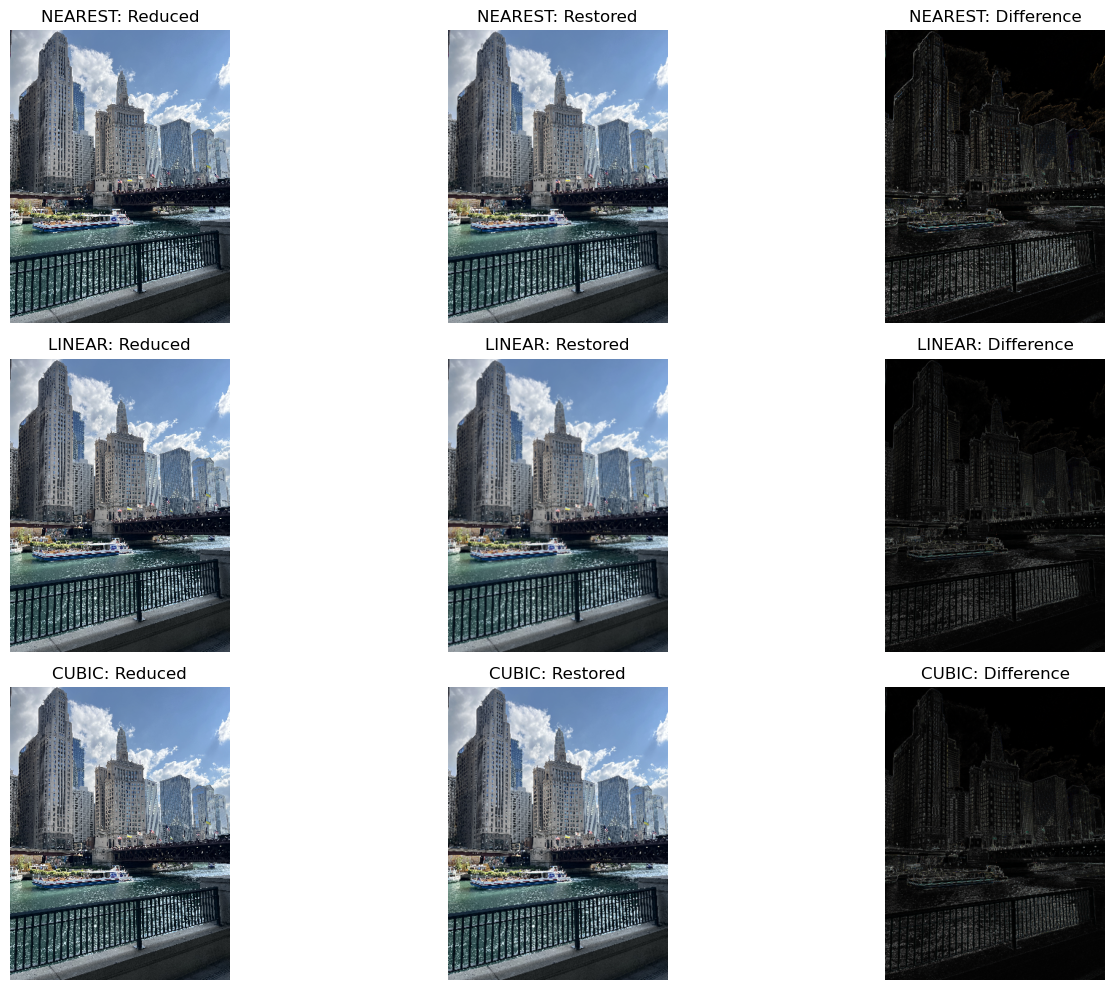

In [46]:
# Create a 3x3 grid for the images
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

##### Results

Original Image: The original image is very sharp and clear,great resolution capturing colors and textures(eg: water waves) with precision.

Reduced (Nearest): Nearest neighbor reduction has an interesting reult where image looks kinda blocky. It's more like a pixelated image where fine details are replaced by large patches of solid color.

Reduced (Bilinear): Compared to nearest neighbor it is smoother, but it looks blurry and not as sharp as the original.

Reduced (Bicubic): Bicubic reduction delivers the best quality, keeping the details and smoothness closest to the original image.

Restored (Nearest): The restored nearest neighbor image stays blocky and pixelated, with no recovery of the finer details.

Restored (Bilinear): Smoother than the nearest neighbor restoration, but it still looks a bit blurry and doesn’t regain the sharpness of the original.

Restored (Bicubic): Bicubic restoration stands out by preserving the most details and smoothness, making it the closest to the original quality.

Difference (Nearest): Subtraction with nearest neighbor highlights major differences, with large areas of missing details.

Difference (Bilinear): While smoother, bilinear subtraction still shows noticeable blurring and a loss of clarity/sharpness compared to the original.

Difference(Bicubic): Bicubic subtraction shows the smallest differences, proving it preserves the most detail and stays closest to the original image.

##  Part 3 – Reducing the number of Gray Levels in an Image

### Write code that reduces the number of gray levels in an image from 256 to 2, in integer powers of 2. Do not use library functions to do this, implement in your code the pixel math necessary for the gray level reduction. For each input image, your display should include 8 images (as we saw in class), the original and the 7 reduced intensity images. Strive to have your images not to display darker and darker as you reduce the number of intensities.
###  In addition, write code such that the desired number of gray levels does not have to be a power of 2. Show an example run of your code using a non-integer power of 2 (e.g. 2^3.7) number of gray levels.

In [50]:
image3 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW1/Image3.jpeg")

In [51]:
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

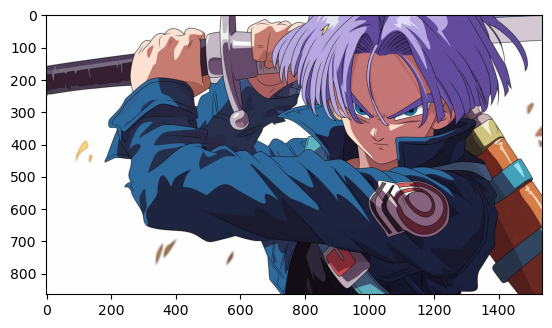

In [52]:
# Display the image
plt.imshow(image3_rgb)

Data source:  https://wallpapers-clan.com/desktop-wallpapers/dragon-ball-future-trunks-with-sword/

For the third picture, I am using a favorite anime charecter Trunks from Dragon Ball Z 

In [54]:
image3_gray = cv2.cvtColor(image3_rgb, cv2.COLOR_RGB2GRAY)

In [55]:
def reduce_gray_levels(image, levels):
    factor = 255 / (levels - 1)
    return np.round(np.round(image / factor) * factor).astype(np.uint8)

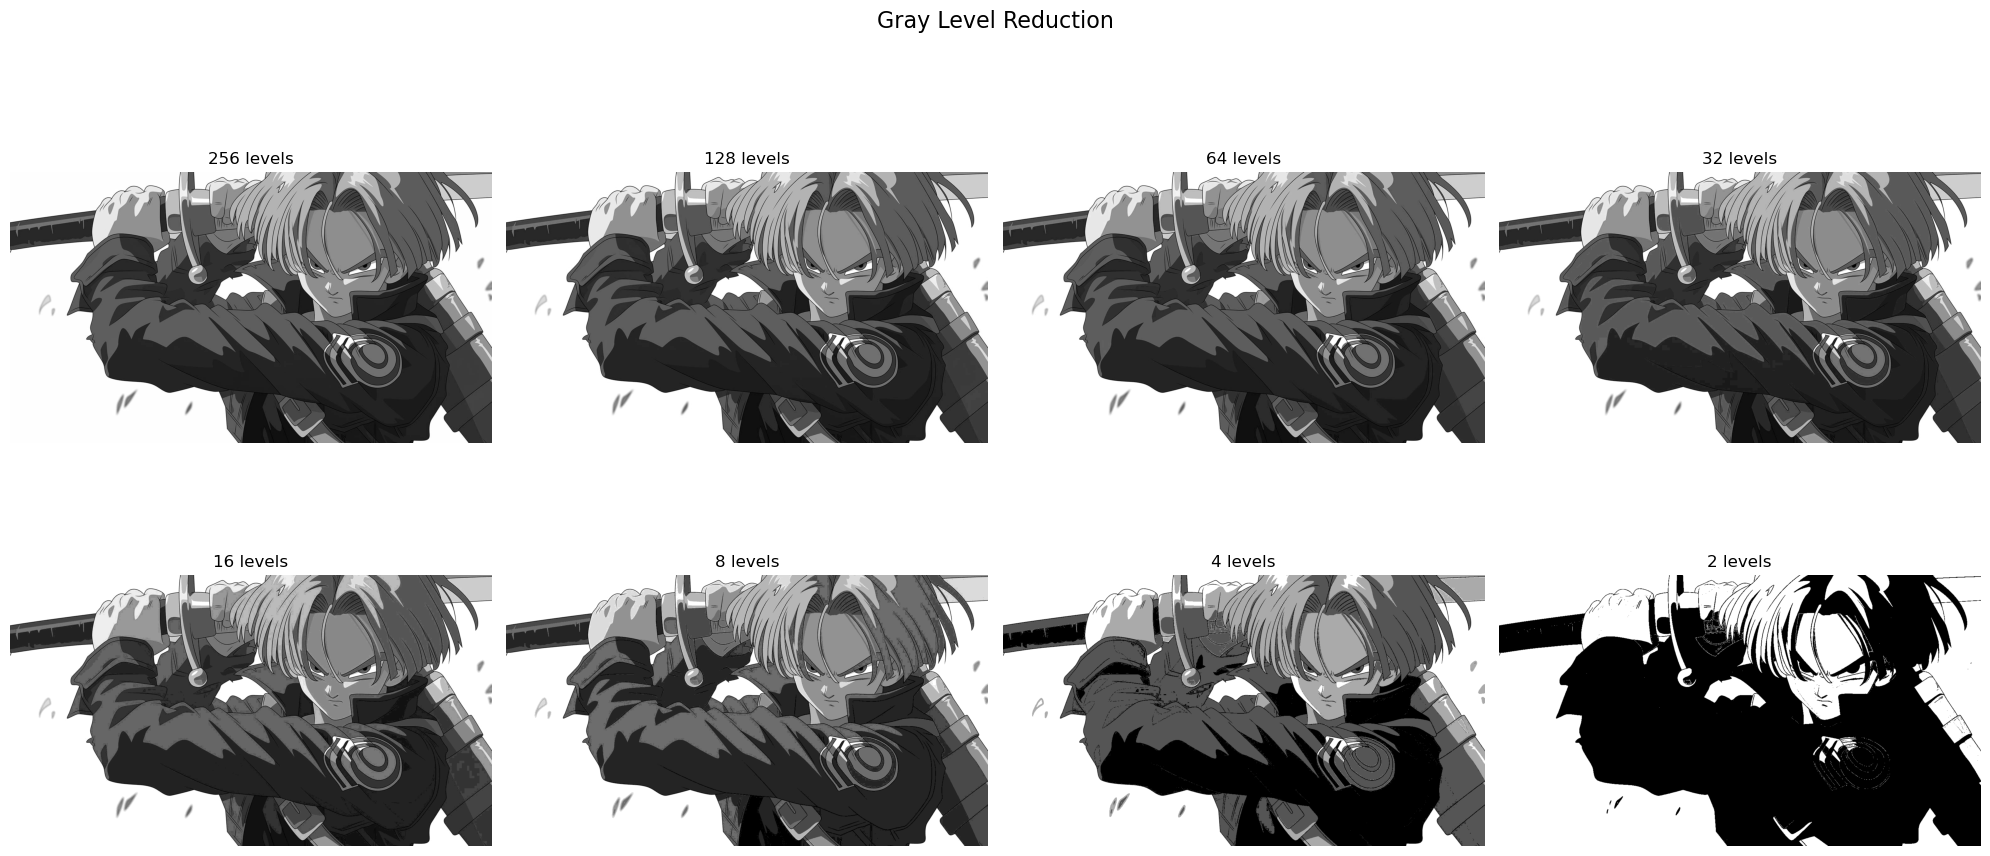

In [56]:
# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Gray Level Reduction', fontsize=16)
levels_list = [256, 128, 64, 32, 16, 8, 4, 2]

for i, levels in enumerate(levels_list):
    reduced = reduce_gray_levels(image3_gray, levels)
    row, col = divmod(i, 4)
    axs[row, col].imshow(reduced, cmap='gray', vmin=0, vmax=255)
    axs[row, col].set_title(f'{levels} levels')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

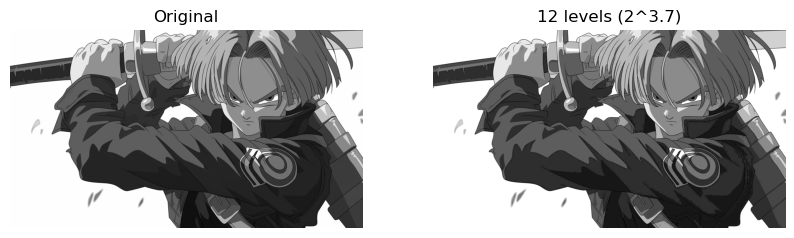

In [57]:
# Example with non-integer power of 2
non_int_levels = int(2 ** 3.7)
reduced_non_int = reduce_gray_levels(image3_gray, non_int_levels)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image3_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(reduced_non_int, cmap='gray', vmin=0, vmax=255)
plt.title(f'{non_int_levels} levels (2^3.7)')
plt.axis('off')
plt.show()

##### Results

The implementation reduces an image’s gray levels from 256 to powers of 2, starting at 128 and going down to just 2. It ensures the image doesn’t get darker as levels decrease and even handles fractional gray levels (like 2^3.7), which results in about 13 levels. The output compares the original image with versions that progressively lose gray levels (128, 64, 32, etc.). Even with the reduced levels, the contrast stays intact, and the images don’t look overly dark.